# A altura de um jogador de basquete influência na sua pontuação média por partida?

### O objetivo deste projeto é, por meio de regressão linear, responder a  pergunta acima. Como base utilizamos o dataset "NBA Players stats since 1950", disponível no site kaggle. 
### Para isso iremos analisar as seguintes variáveis:
#### - Height 
#### - PTS (pontuação do jogador durante a temporada)
#### - Player (nome do jogador)
#### - G (quantidade de jogos durante a temporada)

In [73]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import cmath
plt.style.use('ggplot')

import itertools
import pylab
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import pearsonr
from matplotlib import cm
import statsmodels.api as sm1 #Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as sm  #Usa OLS como no R
import scipy
from scipy.stats import norm


In [2]:
! explorer . 

In [3]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\giiol\Desktop\proj 3\cd_projeto3


In [4]:
#Se usar o arquivo descompactado
dados1 = pd.read_table('Players.csv', encoding="latin1",sep=',')
dados2 = pd.read_table('Seasons_Stats.csv', encoding="latin1",sep=',')
    

In [5]:
######apagar
#criar uma tabela somento com o nome do jogador e a altura
#tabela_altura = dados1.loc [:,["Player", "height"]]  

In [6]:
#Qual posição tem mais informações? (vamos analisar a que tiver mais informações)
print ("F: {0}".format(len(dados2[dados2.Pos == "F"])))
print ("C: {0}".format(len(dados2[dados2.Pos == "C"])))
print ("G: {0}".format(len(dados2[dados2.Pos == "G"])))
print ("G-F: {0}".format(len(dados2[dados2.Pos == "G-F"])))
print ("F-C: {0}".format(len(dados2[dados2.Pos == "F-C"])))
print ("F-G: {0}".format(len(dados2[dados2.Pos == "F-G"])))
print ("PG: {0}".format(len(dados2[dados2.Pos == "PG"])))
print ("PF: {0}".format(len(dados2[dados2.Pos == "PF"])))
print ("SF: {0}".format(len(dados2[dados2.Pos == "SF"])))
print ("SG: {0}".format(len(dados2[dados2.Pos == "SG"])))

F: 123
C: 4759
G: 139
G-F: 79
F-C: 81
F-G: 60
PG: 4648
PF: 4966
SF: 4699
SG: 4811


### Podemos observar que a posição com mais informações é a "PF", que representa Pivô, então vamos analisar os dados somente dos mesmos.
### A análise de uma única posição do basquete, auxilia para que os dados obtidos sejam mais coerentes, dado que cada uma exerce funções diferentes.

In [7]:
dados1.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [8]:
#limpar a primeira tabela para que tenha apenas as variáveis que vamos utilizar
dados1 = dados1.loc[:,["Player", "height"]]  
dados1.head()

,Player,height
0,Curly Armstrong,180.0
1,Cliff Barker,188.0
2,Leo Barnhorst,193.0
3,Ed Bartels,196.0
4,Ralph Beard,178.0


In [9]:
dados2.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [10]:
#tabela com dados dos pivos "PF"
tabela_PF = dados2[dados2.Pos == "PF"]
tabela_PF.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
17,17,1950.0,Bob Brannum,PF,24.0,SHE,59.0,NaN,NaN,NaN,...,0.690,NaN,NaN,NaN,205.0,NaN,NaN,NaN,279.0,713.0
23,23,1950.0,Walt Budko,PF,24.0,BLB,66.0,NaN,NaN,NaN,...,0.757,NaN,NaN,NaN,146.0,NaN,NaN,NaN,259.0,595.0
41,41,1950.0,Jack Coleman,PF,25.0,ROC,68.0,NaN,NaN,NaN,...,0.744,NaN,NaN,NaN,153.0,NaN,NaN,NaN,223.0,590.0
45,45,1950.0,Dillard Crocker,PF,25.0,DNN,53.0,NaN,NaN,NaN,...,0.735,NaN,NaN,NaN,85.0,NaN,NaN,NaN,223.0,723.0
68,68,1950.0,Joe Fulks*,PF,28.0,PHW,68.0,NaN,NaN,NaN,...,0.696,NaN,NaN,NaN,56.0,NaN,NaN,NaN,240.0,965.0


In [11]:
#apagar os dados nulos da altura
dados1 = dados1.loc[pd.notnull(dados1.height),:]
dados1.head()

,Player,height
0,Curly Armstrong,180.0
1,Cliff Barker,188.0
2,Leo Barnhorst,193.0
3,Ed Bartels,196.0
4,Ralph Beard,178.0


In [12]:
#modificando a tabela_PF para ter apenas os dados que são uteis para nós(ou que poderão ser)
#G = games
#FT% = porcentagem de acertos (acertos/quanto tentou)
#AST = assistências 
#PTS = pontos 
tabela_PF = tabela_PF.loc[:,["Player", "G", "FT%",  "AST", "PTS" , "BLK"]]  
tabela_PF.head()

,Player,G,FT%,AST,PTS,BLK
17,Bob Brannum,59.0,0.690,205.0,713.0,NaN
23,Walt Budko,66.0,0.757,146.0,595.0,NaN
41,Jack Coleman,68.0,0.744,153.0,590.0,NaN
45,Dillard Crocker,53.0,0.735,85.0,723.0,NaN
68,Joe Fulks*,68.0,0.696,56.0,965.0,NaN


In [13]:
df = tabela_PF.set_index('Player').join(dados1.set_index('Player'), how='inner', lsuffix='tabela_PF',rsuffix='dados1')
#df = df[['M_PONTOS','height']].dropna()
#df.plot.scatter('M_PONTOS','height')

#tabela_PF.set_index('M_PONTOS').join(dados1.set_index('height'), lsuffix='_caller', rsuffix='_other')

In [66]:

dados2.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [14]:
dados2.Player.value_counts()

Eddie Johnson       33
Mike Dunleavy       32
Gerald Henderson    29
Nazr Mohammed       28
Kevin Willis        27
George Johnson      26
Joe Smith           26
James Edwards       25
Andre Miller        25
Juwan Howard        25
Reggie Williams     24
Jim Jackson         24
Theo Ratliff        24
Tyrone Corbin       24
Vince Carter        23
Drew Gooden         23
Kevin Ollie         23
Kevin Garnett       23
Jason Kidd          23
Chauncey Billups    23
Rod Strickland      23
Charles Smith       23
Charles Jones       23
Tim Thomas          22
Kenny Anderson      22
Sam Cassell         22
Herb Williams       22
Danny Schayes       22
Avery Johnson       22
John Lucas          22
                    ..
Marques Bragg        1
Mike Smith           1
Dave Scholz          1
Ben Clyde            1
Forest Able          1
Will Frazier         1
Rick Hughes          1
Cheese Johnson       1
Vernon Macklin       1
Charlie Lowery       1
Tomas Satoransky     1
Keith Appling        1
Dwayne Whit

In [15]:
df.head()

,G,FT%,AST,PTS,BLK,height
Player,,,,,,
A.C. Green,82.0,0.611,54.0,521.0,49.0,203.0
A.C. Green,79.0,0.780,84.0,852.0,80.0,203.0
A.C. Green,82.0,0.773,93.0,937.0,45.0,203.0
A.C. Green,82.0,0.786,103.0,1088.0,55.0,203.0
A.C. Green,82.0,0.751,90.0,1061.0,50.0,203.0


### Criando uma coluna para a média de pontos que cada jogador faz durante a temporada.
### media = (quantidade de pontos)/(quantidade de jogos)

In [16]:
media = df.loc[(df.G!=0), 'm_ponto'] = df.PTS/df.G

In [17]:
df = df.loc[pd.notnull(df.m_ponto),:]
df = df.loc[pd.notnull(df.height),:]

In [19]:
import numpy as np
import statsmodels.api as sm


Y = df["m_ponto"]
X = df["height"]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\giiol\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                m_ponto   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.07597
Date:                Thu, 16 Nov 2017   Prob (F-statistic):              0.783
Time:                        15:04:19   Log-Likelihood:                -15820.
No. Observations:                4966   AIC:                         3.164e+04
Df Residuals:                    4964   BIC:                         3.166e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0399      3.433      2.633      0.008       2.310      15.770
height        -0.0046      0.017     -0.276      0.783      -0.038       0.028
==============================================================================
Omnibus:                      572.347   Durbin-Watson:                   0.537
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              785.829
Skew:                           0.958   Prob(JB):                    2.29e-171
Kurtosis:                       3.361   Cond. No.                     8.46e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Percebemos que não há relevância entre altura e a quantidade de pontos feita dado que R² = 0.

### Como não houve uma considerável relação entre a altura e a quantidade de pontos, vamos analisar se existe alguma relação entre a altura e a quantidade de bloqueios.


In [26]:
df = df.loc[pd.notnull(df.BLK),:]

In [27]:
df.head()

,G,FT%,AST,PTS,BLK,height,m_ponto,lnheight
Player,,,,,,,,
A.C. Green,82.0,0.611,54.0,521.0,49.0,203.0,6.353659,5.313206
A.C. Green,79.0,0.780,84.0,852.0,80.0,203.0,10.784810,5.313206
A.C. Green,82.0,0.773,93.0,937.0,45.0,203.0,11.426829,5.313206
A.C. Green,82.0,0.786,103.0,1088.0,55.0,203.0,13.268293,5.313206
A.C. Green,82.0,0.751,90.0,1061.0,50.0,203.0,12.939024,5.313206


<IPython.core.display.Javascript object>


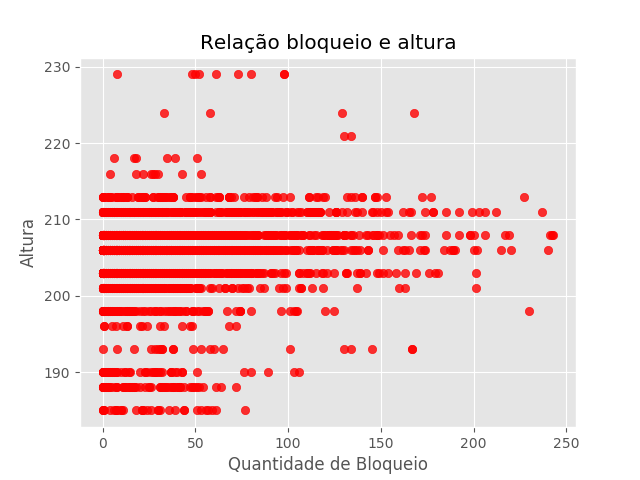

In [45]:
hmax = df.height.max()
hmin = df.height.min()

plt.title("Relação bloqueio e altura")
plt.xlabel("Quantidade de Bloqueio")
plt.ylabel("Altura")
plt.scatter(df.BLK, df.height, c='red', alpha=0.8)
plt.show()

### Analisando a relação somente entre o bloqueio e a altura, conseguimos ver que existe uma dependência entre ambos.
### Então, agora vamos analisar se existe relação entre vamos analisar se existe alguma relação entre a altura,  quantidade de bloqueios e a pontuação média de cada jogador.
### Para isso, vamos fazer uma regressão múltipla

In [35]:
df.describe()

,G,FT%,AST,PTS,BLK,height,m_ponto,lnheight
count,4294.000000,4129.000000,4294.000000,4294.000000,4294.000000,4294.000000,4294.000000,4294.000000
mean,50.107592,0.689141,69.583838,479.701910,31.401956,205.172566,7.854124,5.323557
std,26.698523,0.142893,77.161710,469.964744,36.505351,4.921303,5.815099,0.024388
min,1.000000,0.000000,0.000000,0.000000,0.000000,185.000000,0.000000,5.220356
25%,26.000000,0.627000,12.000000,97.000000,6.000000,203.000000,3.282967,5.313206
50%,55.000000,0.711000,45.000000,333.000000,19.000000,206.000000,6.283784,5.327876
75%,76.000000,0.776000,99.000000,746.750000,43.000000,208.000000,11.225921,5.337538
max,86.000000,1.000000,598.000000,2540.000000,243.000000,229.000000,30.975610,5.433722


In [38]:
df.columns

Index(['G', 'FT%', 'AST', 'PTS', 'BLK', 'height', 'm_ponto', 'lnheight'], dtype='object')

In [39]:
colunas = ['G', 'FT%', 'AST', 'PTS', 'BLK', 'm_ponto', 'height',
       'weight']

In [40]:
colunas = [ 'BLK',  'height']


In [43]:
Y = df["m_ponto"]
X = df.loc[:, colunas]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                m_ponto   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     1177.
Date:                Thu, 16 Nov 2017   Prob (F-statistic):               0.00
Time:                        15:19:24   Log-Likelihood:                -12713.
No. Observations:                4294   AIC:                         2.543e+04
Df Residuals:                    4291   BIC:                         2.545e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.5313      2.996      6.520      0.000      13.658      25.405
BLK            0.0956      0.002     48.476      0.000       0.092       0.100
height        -0.0716      0.015     -4.889      0.000      -0.100      -0.043
==============================================================================
Omnibus:                      721.402   Durbin-Watson:                   0.623
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1307.656
Skew:                           1.060   Prob(JB):                    1.11e-284
Kurtosis:                       4.677   Cond. No.                     8.72e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
p = itertools.permutations(colunas)

In [47]:
blk = df["BLK"].max()
height_max = df["height"].max()


<IPython.core.display.Javascript object>


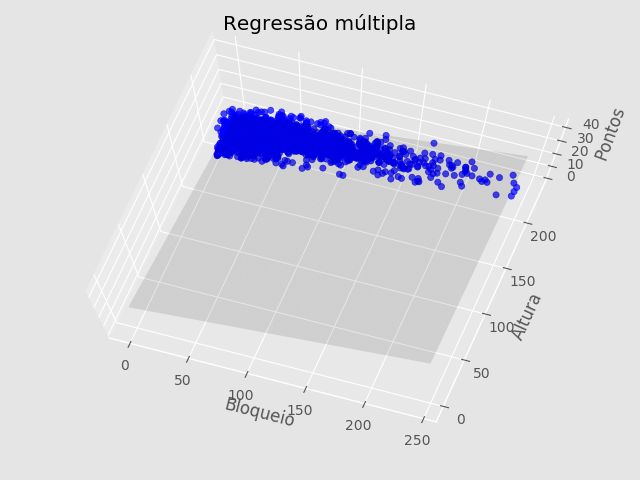

C:\Users\giiol\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [59]:
fig = pylab.figure()
ax = Axes3D(fig)
model = sm.ols(formula='m_ponto ~ BLK + height', data = df)
fit = model.fit()
fit.summary()

#fig = plt.figure(figsize=(12,8))
#ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, blk, 2)                # generate a mesh
y_surf = np.arange(0, height_max, 0.5)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'BLK': x_surf.ravel(), 'height': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.1)

ax.scatter(df['BLK'], df['height'], df['m_ponto'],
           c='blue',
           marker='o',
           alpha=0.7)

ax.set_xlabel('Bloqueio')
ax.set_ylabel('Altura')
ax.set_zlabel('Pontos')
plt.title("Regressão múltipla")

plt.show()


### Para uma melhor análise dessa relação, utilizaremos a variável altura em sua forma logarítima:

**** explicar melhoro AAAAAAAAA

In [61]:
df['lnheight'] = np.log(df['height'])
df.head()
lnheight_max = df["lnheight"].max()

<IPython.core.display.Javascript object>


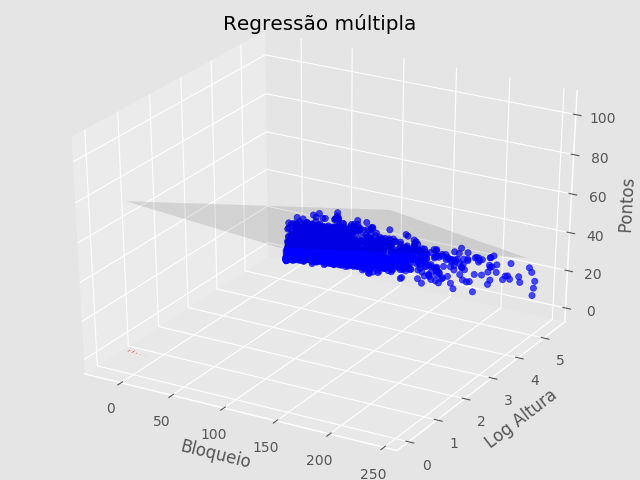

C:\Users\giiol\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [62]:
fig = pylab.figure()
ax = Axes3D(fig)
model = sm.ols(formula='m_ponto ~ BLK + lnheight', data = df)
fit = model.fit()
fit.summary()

#fig = plt.figure(figsize=(12,8))
#ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, blk, 2)                # generate a mesh
y_surf = np.arange(0, lnheight_max, 0.5)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'BLK': x_surf.ravel(), 'lnheight': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.1)

ax.scatter(df['BLK'], df['lnheight'], df['m_ponto'],
           c='blue',
           marker='o',
           alpha=0.7)

ax.set_xlabel('Bloqueio')
ax.set_ylabel('Log Altura')
ax.set_zlabel('Pontos')
plt.title("Regressão múltipla")

plt.show()


In [64]:
colunasln = [ 'BLK',  'lnheight']

In [65]:
import numpy as np
import statsmodels.api as sm

Y = df["m_ponto"]
X = df.loc[:, colunasln]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                m_ponto   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     1176.
Date:                Thu, 16 Nov 2017   Prob (F-statistic):               0.00
Time:                        15:35:08   Log-Likelihood:                -12713.
No. Observations:                4294   AIC:                         2.543e+04
Df Residuals:                    4291   BIC:                         2.545e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.2058     15.708      5.170      0.000      50.410     112.002
BLK            0.0956      0.002     48.475      0.000       0.092       0.099
lnheight     -14.3426      2.952     -4.858      0.000     -20.130      -8.555
==============================================================================
Omnibus:                      721.755   Durbin-Watson:                   0.623
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1308.408
Skew:                           1.061   Prob(JB):                    7.64e-285
Kurtosis:                       4.677   Cond. No.                     1.08e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<IPython.core.display.Javascript object>


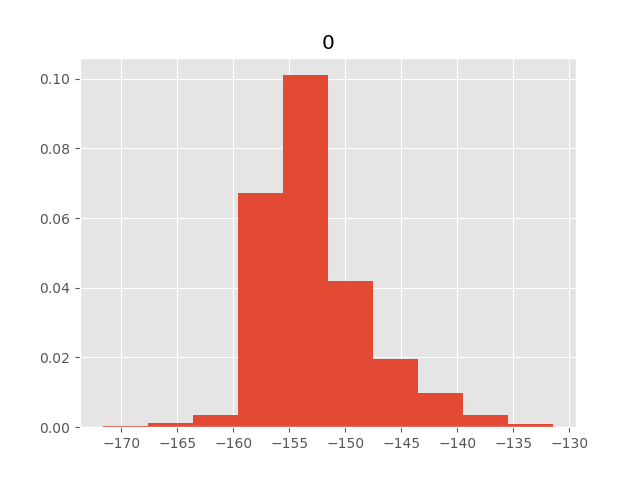

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BA1BFB2358>]], dtype=object)

In [90]:
from scipy.stats import norm
var = df.var()
sigma = var**(0.5)
rec = sorted(df)
x = df.BLK
y = df.lnheight
z = df.m_ponto
e = z - (results.params.const+ results.params.BLK*x - results.params.lnheight * y)
e
pd.DataFrame(e).hist(normed=True)
# plt.plot(rec , stats.norm.pdf(rec, loc = 0, scale =sigma), 'b', lw = 3, alpha = 0.8)
#quanto mais normal for o residup, melhor o modelo
#quanto mais proximo da normal menos erro tem no residuo

#o ideal é ser uma normal